# Assignment 6
Create a convolutional neural network (CNN) architecture to classify the ten different types
of objects present in the fashion MNIST dataset.

Note:
Loading the dataset:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

## Importing necessary files

In [51]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Loading Dataset

In [52]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

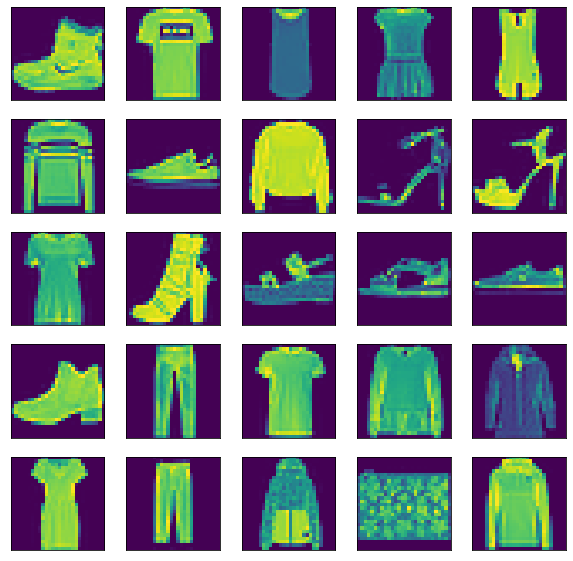

In [53]:
#Classnames with pictures

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

In [54]:

train_images[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [55]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [56]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [57]:
train_images.shape

(60000, 28, 28)

In [58]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [59]:
train_images[10].shape

(28, 28, 1)

In [60]:
from tensorflow.keras.utils import to_categorical
train_labels_oh = to_categorical(train_labels)
test_labels_oh = to_categorical(test_labels)

In [61]:
train_labels_oh[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## Model Creation

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(
    layers.Dense(64, activation='relu')
    )
model.add(layers.Dense(10, activation='softmax'))

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [65]:
#Fitting Model
history = model.fit(train_images, train_labels_oh, epochs=10, 
                    validation_data=(test_images, test_labels_oh))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4970 - accuracy: 0.8175 - val_loss: 0.3858 - val_accuracy: 0.8616
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3232 - accuracy: 0.8832 - val_loss: 0.3061 - val_accuracy: 0.8896
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2745 - accuracy: 0.8985 - val_loss: 0.3002 - val_accuracy: 0.8878
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2456 - accuracy: 0.9088 - val_loss: 0.2907 - val_accuracy: 0.8953
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2217 - accuracy: 0.9186 - val_loss: 0.2666 - val_accuracy: 0.9021
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2000 - accuracy: 0.9245 - val_loss: 0.2600 - val_accuracy: 0.9075
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1840 - accuracy: 0.9314 - val_loss: 0.2549 - val_accuracy:

Training completed with Accuracy 0.946 and val_accuracy 0.9021

## Model Evaluation

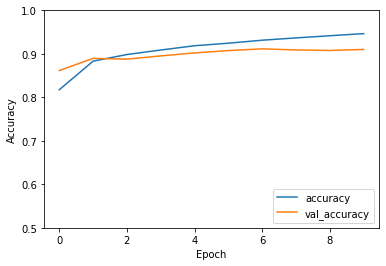

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_oh, verbose=2)

313/313 - 1s - loss: 0.2839 - accuracy: 0.9021 - 699ms/epoch - 2ms/step


([], <a list of 0 Text major ticklabel objects>)

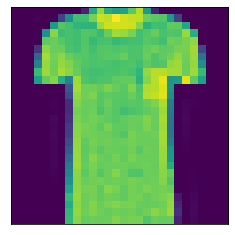

In [33]:
plt.imshow(test_images[501])
plt.xticks([])
plt.yticks([])

In [37]:
print(test_labels[501])

0


In [38]:
class_names[0]

'T-shirt/top'

In [39]:
sample = test_images[501].reshape(1,28,28,1)
y_pred = model.predict(sample)

1/1 [==============================] - 0s 17ms/step


In [40]:
y_pred

array([[9.9746019e-01, 8.1898401e-07, 1.6655492e-03, 1.3728451e-06,
        4.9514364e-07, 4.2472772e-09, 8.7062892e-04, 1.0456954e-09,
        9.0112655e-07, 1.4017313e-09]], dtype=float32)

In [41]:
output = y_pred.tolist()

In [42]:
output

[[0.9974601864814758,
  8.18984005945822e-07,
  0.0016655492363497615,
  1.3728450767303002e-06,
  4.951436380906671e-07,
  4.247277196611776e-09,
  0.0008706289227120578,
  1.0456954191440104e-09,
  9.011265547087532e-07,
  1.4017312865988174e-09]]

In [43]:
np.argmax(y_pred)

0

In [45]:
class_names[0]

'T-shirt/top'

## Testing the model

In [46]:
for i in range(10):
  sample = test_images[500+i].reshape(1,28,28,1)
  y_pred = model.predict(sample)
  pred_class = y_pred.argmax()
  predicted_category = class_names[pred_class]

  expected_class = test_labels[500+i]
  expected_category = class_names[expected_class]

  print(f"Expected: {expected_category}", end=" ")
  print(f"Predicted: {predicted_category}")
  print()


1/1 [==============================] - 0s 28ms/step
Expected: Pullover Predicted: Pullover

1/1 [==============================] - 0s 28ms/step
Expected: T-shirt/top Predicted: T-shirt/top

1/1 [==============================] - 0s 27ms/step
Expected: Sandal Predicted: Sandal

1/1 [==============================] - 0s 34ms/step
Expected: Sneaker Predicted: Sneaker

1/1 [==============================] - 0s 34ms/step
Expected: Trouser Predicted: Trouser

1/1 [==============================] - 0s 34ms/step
Expected: Bag Predicted: Bag

1/1 [==============================] - 0s 49ms/step
Expected: Pullover Predicted: Pullover

1/1 [==============================] - 0s 37ms/step
Expected: Pullover Predicted: Pullover

1/1 [==============================] - 0s 31ms/step
Expected: Pullover Predicted: Pullover

1/1 [==============================] - 0s 28ms/step
Expected: Pullover Predicted: Pullover



Model predicted all the given images successfully

                                                    Submitted By Ajuma Mohammed